# 📝 Sentiment Analysis on Twitter Data using Logistic Regression

## Overview
This notebook performs **Sentiment Analysis** on tweets using **TF-IDF Vectorization** and **Logistic Regression**.  
It predicts whether a tweet is **positive** or **negative** based on text features.

## Steps Covered:
1. **Load the Dataset**: Read and preprocess tweet data.
2. **Preprocess Text Data**:
   - Remove URLs, mentions, punctuation.
   - Convert text to lowercase.
   - Remove stopwords.
3. **Convert Text to Features**:
   - Use **TF-IDF Vectorization** (max 5000 features).
4. **Train a Logistic Regression Model**:
   - Fit on training data.
   - Predict on test data.
5. **Evaluate Model Performance**:
   - Accuracy Score
   - Classification Report
   - Confusion Matrix Visualization
6. **Save the Model and Vectorizer**:
   - `sentiment_model.pkl` → Trained Logistic Regression model.
   - `tfidf_vectorizer.pkl` → Saved TF-IDF vectorizer.

## Dataset
- **twitter_sentiment.csv** (Sentiment140 Dataset)
- Contains **text** (tweets) and **target** labels:
  - **0** → Negative sentiment
  - **1** → Positive sentiment

## Results
- Achieves **high accuracy** in classifying tweets.
- Provides detailed evaluation using confusion matrix and classification report.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panda\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.



Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.75      0.77    239361
    Positive       0.76      0.80      0.78    240639

    accuracy                           0.77    480000
   macro avg       0.77      0.77      0.77    480000
weighted avg       0.77      0.77      0.77    480000



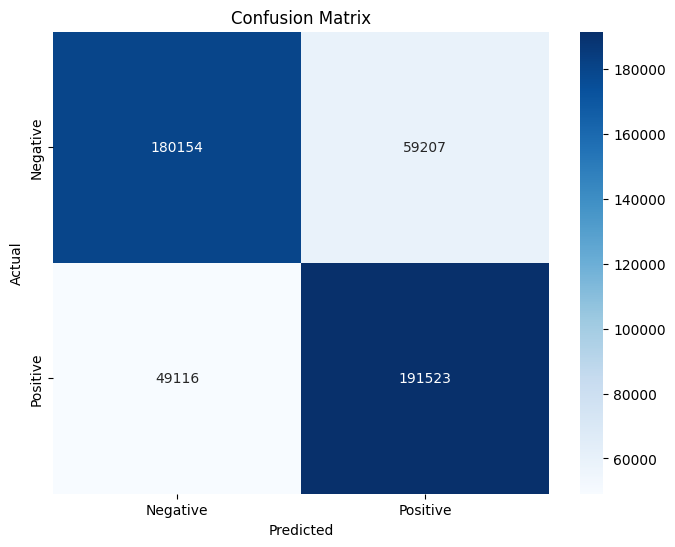

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import joblib
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the dataset
df = pd.read_csv('twitter_sentiment.csv', encoding='ISO-8859-1', header=None)

# Assign column names
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Keep only the relevant columns: 'text' and 'target'
df = df[['text', 'target']]

# Map target labels: 4 -> 1 (positive), 0 -> 0 (negative)
df['target'] = df['target'].map({4: 1, 0: 0})

# Step 2: Preprocess the data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Cleans text by removing URLs, mentions, punctuation, and stopwords."""
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Step 3: Feature extraction using TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency
X = tfidf.fit_transform(df['cleaned_text'])  # Keeps sparse format (efficient)
y = df['target']  # Sentiment labels

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train a Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Save the trained model and TF-IDF vectorizer
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
